In [2]:
##Run all the scripts

# %run ../Pyscripts/MT_SE_PT_Preprocess.py
# %run ../Pyscripts/MT_SE_PT_Visusalisation.py
# %run ../Pyscripts/MT_SE_PT_Turbine_Funtions.py
%run ../Pyscripts/MT_SE_PT_CombineDF_preprocess.py
%run ../Pyscripts/MT_SE_PT_Funtions.py
%run ../Pyscripts/MT_SE_PT_Heatmap.py
%run ../Pyscripts/MT_SE_PT_Tuner.py
%run ../Pyscripts/MT_SE_PT_CombineDF_Model.py
%run ../Pyscripts/MT_SE_PT_CombineDF_Heatmaps.py


Exception: File `'../Pyscripts/MT_SE_PT_CombineDF_preprocess.py'` not found.

In [4]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('C://Users//z004csar//Desktop//Thesis_Project//Data to train') if isfile(join('C:/Users/z004csar/Desktop/Thesis_Project/Data to train', f))]

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C://Users//z004csar//Desktop//Thesis_Project//Data to train'

In [ ]:
onlyfiles

In [ ]:
###Unbalanced Dataset

##Data from Gazli20210618Unbalanced
DS = []
count = 1
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    File  = pd.read_excel(f'C:/Users/z004csar/Desktop/Thesis_Project/Data to train/SGT-750, Chimei-1_20210906_Kundprov.xlsx',engine="openpyxl",index_col=0)
        

In [1]:
DS = []
for i in onlyfiles:
    DS.append(preprocess_combineburner_TP(pd.read_excel(f'C:/Users/z004csar/Desktop/Thesis_Project/Data to train/{i}',engine="openpyxl",index_col=0)))
        

NameError: name 'onlyfiles' is not defined

In [4]:
stackdf = pd.concat(DS).reset_index(drop=True)

NameError: name 'DS' is not defined

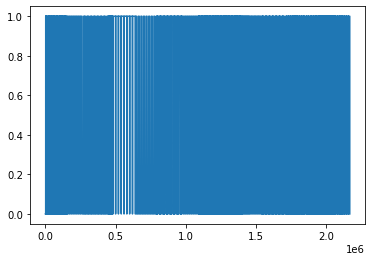

In [7]:
plt.plot(stackdf['BurnerStatus'])

In [6]:
# Data Arrangement is totally different from the previous arrangements.
# Get new dataarrangement

###Balanced Dataset
##Data from Gazli20210618Unbalanced
with warnings.catch_warnings(record=True):
    warnings.simplefilter("always")
    Gazli20210618Balanced = pd.read_excel('..\\Data to train\\NewDatasets\\Gazli-1_750_20210629_flamedetector_data(T6 and T7).xlsx',engine="openpyxl",index_col=0)



In [22]:
# # Set up the matplotlib plot configuration
# #
# f, ax = plt.subplots(figsize=(12, 10))
# #
# # Generate a mask for upper traingle
# #
# mask = np.triu(np.ones_like(corr, dtype=bool))
# #
# # Configure a custom diverging colormap
# #
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# #
# # Draw the heatmap
# #
# sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [ ]:
stackdf1 = stackdf[:2107408]

In [ ]:
stackdf2 = stackdf[2107408:]

In [ ]:
stackdf2.shape

In [3]:
y = stackdf.iloc[:,0]
X = stackdf.iloc[:,1:]

NameError: name 'stackdf' is not defined

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [2]:
%%time
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='liblinear', random_state=21,penalty = 'l2',max_iter=249)#,multi_class = 'multinomial', max_iter = 1000)

# turbine_model_eval(X,y,log_model)
XYconfumatrixCDF_ALLModels(X_train, X_test, y_train, y_test,log_model)

NameError: name 'X_train' is not defined

In [23]:
%%time
##Scaled 
Model_testing_newdata(stackdf1,stackdf2,log_model,S = True, MS = 'Minmax')

The score using LogisticRegression(max_iter=249, random_state=21, solver='liblinear')  after training on Data1 and testing on Data2 is 99.72833333333332
Wall time: 4.06 s


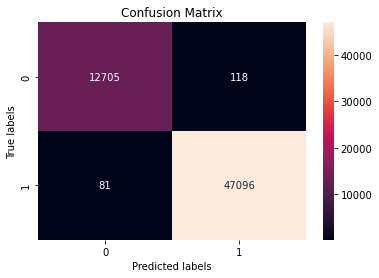

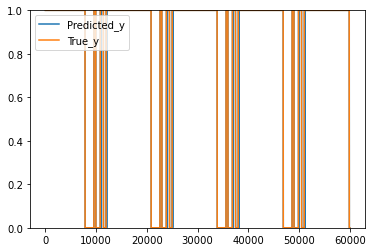

FN : 81 
FP : 118 
TN : 12705 
TP : 47096
Wall time: 6.4 s


In [24]:
%%time
ConfusionmatrixTrainHighTestLow  = {
    "LGM": confumatrixCDF(stackdf1,stackdf2,log_model),
}

## RandomForest 

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(max_depth=2, random_state=0)

In [26]:
%%time
Model_testing_newdata(stackdf1,stackdf2,rfclf)

The score using RandomForestClassifier(max_depth=2, random_state=0)  after training on Data1 and testing on Data2 is 99.76833333333333
Wall time: 1min 14s


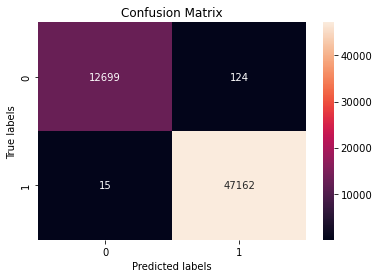

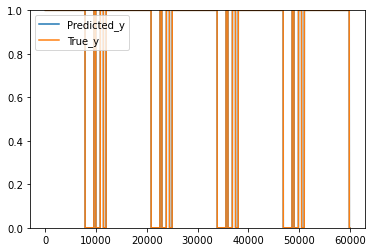

FN : 15 
FP : 124 
TN : 12699 
TP : 47162
Wall time: 1min 9s


In [27]:
%%time
ConfusionmatrixTrainHighTestLow  = {
    "RF": confumatrixCDF(stackdf1,stackdf2,rfclf),
}

## SVM

In [29]:
from sklearn import svm
svclf = svm.SVC(probability=True)

In [ ]:
%%time
Model_testing_newdata(stackdf1,stackdf2,svclf)

In [ ]:
%%time
##Scaled Minmax
Model_testing_newdata(stackdf1,stackdf2,svclf,S = True,MS = 'Minmax')

In [ ]:
%%time
ConfusionmatrixTrainHighTestLow  = {
    "SVM": confumatrixCDF(stackdf1,stackdf2,svclf),
}

## LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
ldaclf = LinearDiscriminantAnalysis()

In [ ]:
%%time
Model_testing_newdata(stackdf1,stackdf2,ldaclf)

In [ ]:
%%time
ConfusionmatrixTrainHighTestLow  = {
    "LDA": confumatrixCDF(stackdf1,stackdf2,ldaclf),
}

### XGBoost

In [ ]:
%%time
import xgboost as xgb
xgbmodel = xgb.XGBClassifier()

In [6]:
Model_eval(stackdf,xgbmodel)

NameError: name 'stackdf' is not defined

In [ ]:
%%time
ConfusionmatrixTrainHighTestLow  = {
    "XGB": confumatrix_XGB(stackdf1,stackdf2,xgbmodel),
}

### MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
mlpclf = MLPClassifier(random_state=21, max_iter=300)

In [ ]:
%%time
Model_testing_newdata(stackdf1,stackdf2,mlpclf)

In [ ]:
%%time
##Min-Max Scaling 
Model_testing_newdata(stackdf1,stackdf2,mlpclf,S = True,MS = 'Minmax')

In [ ]:
confumatrixCDF(stackdf1,stackdf2,mlpclf)

## PLS DA

In [ ]:
from sklearn.cross_decomposition import PLSRegression

In [ ]:

pls_binary =PLSRegression(n_components=2)

In [ ]:
%%time
Model_testing_newdata(stackdf1,stackdf2,pls_binary)

###  Coefficient minus

## MultiLayerPerceptron

In [95]:
def create_baseline():
# create model
    nnmodel = Sequential()
    nnmodel.add(Dense(128, input_dim=8, activation='relu'))
    nnmodel.add(Dense(1, activation='sigmoid'))
    # Compile model
    nnmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return nnmodel
# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

ImportError: cannot import name 'to_categorical' from 'keras.utils' (C:\Users\z004csar\Anaconda3\lib\site-packages\keras\utils\__init__.py)